<a href="https://colab.research.google.com/github/Sathira443/Classification_of_Cancer_by_Gene_Expression_Dataset/blob/main/Classification_of_Cancer_by_Gene_Expression_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copied/data_set_ALL_AML_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copied/data_set_ALL_AML_independent.csv')

df_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copied/actual.csv')

In [5]:
df_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [6]:
df_train.shape

(7129, 78)

In [7]:
df_y.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [8]:
df_y.shape

(72, 2)

In [9]:
df_y['cancer'].value_counts()

cancer
ALL    47
AML    25
Name: count, dtype: int64

In [10]:
# Recoding label to numeric
df_y['cancer'].replace('ALL', 0, inplace=True)
df_y['cancer'].replace('AML', 1, inplace=True)

In [ ]:
df_y.head()

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [12]:
df_test.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [13]:
df_train.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


# Remove "call" columns from training and testing data

In [14]:
train_to_keep = [col for col in df_train.columns if 'call' not in col]

In [15]:
train_to_keep

['Gene Description',
 'Gene Accession Number',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '34',
 '35',
 '36',
 '37',
 '38',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33']

In [16]:
test_to_keep = [col for col in df_test.columns if 'call' not in col]

In [17]:
test_to_keep

['Gene Description',
 'Gene Accession Number',
 '39',
 '40',
 '42',
 '47',
 '48',
 '49',
 '41',
 '43',
 '44',
 '45',
 '46',
 '70',
 '71',
 '72',
 '68',
 '69',
 '67',
 '55',
 '56',
 '59',
 '52',
 '53',
 '51',
 '50',
 '54',
 '57',
 '58',
 '60',
 '61',
 '65',
 '66',
 '63',
 '64',
 '62']

In [18]:
X_train_df = df_train[train_to_keep]
X_test_df = df_test[test_to_keep]

In [19]:
X_train_df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [20]:
X_test_df.head()

,Gene Description,Gene Accession Number,39,40,42,47,48,49,41,43,...,54,57,58,60,61,65,66,63,64,62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,-87,22,-243,-130,-256,-62,86,...,-90,-137,-157,-172,-47,-62,-58,-161,-48,-176
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,-248,-153,-218,-177,-249,-23,-36,...,-87,-51,-370,-122,-442,-198,-217,-215,-531,-284
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,262,17,-163,-28,-410,-7,-141,...,102,-82,-77,38,-21,-5,63,-46,-124,-81
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,295,276,182,266,24,142,252,...,319,178,340,31,396,141,95,146,431,9
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,-226,-211,-289,-170,-535,-233,-201,...,-283,-135,-438,-201,-351,-256,-191,-172,-496,-294


# The training and testing column names are not in numeric order, so it's important that we reorder them so that the labels will be in order with the corresponding data.

In [21]:
train_columns = ['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']

In [22]:
X_train_df = X_train_df.reindex(columns = train_columns)

In [23]:
X_train_df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


In [24]:
test_columns = ['Gene Description', 'Gene Accession Number','39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53',  '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72']

In [25]:
X_test_df = X_test_df.reindex(columns = test_columns)

In [27]:
X_train_df.columns

Index(['Gene Description', 'Gene Accession Number', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '36', '37', '38'],
      dtype='object')

In [28]:
X_train_df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,15,-318,-32,-124,-135,-20,7,-213,-25,-72
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-114,-192,-49,-79,-186,-207,-100,-252,-20,-139
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,2,-95,49,-37,-70,-50,-57,136,124,-1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,193,312,230,330,337,101,132,318,325,392
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-51,-139,-367,-188,-407,-369,-377,-209,-396,-324


In [29]:
X_train_df = X_train_df.T

In [30]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [31]:
X_train_df.columns = X_train_df.iloc[1]

In [32]:
X_train_df.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [33]:
X_train_df.drop(['Gene Description', 'Gene Accession Number'], inplace=True)

In [34]:
X_train_df.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [35]:
X_train_df.shape

(38, 7129)

In [36]:
X_test_df = X_test_df.T

In [37]:
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18


In [38]:
X_test_df.columns = X_test_df.iloc[1]

In [40]:
X_test_df.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18


In [41]:
X_test_df.drop(['Gene Description', 'Gene Accession Number'], inplace=True)

In [43]:
X_test_df.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
39,-342,-200,41,328,-224,-427,-656,-292,137,-144,...,277,1023,67,214,-135,1074,475,48,168,-70
40,-87,-248,262,295,-226,-493,367,-452,194,162,...,83,529,-295,352,-67,67,263,-33,-33,-21
41,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,129,383,46,104,15,245,164,84,100,-18
42,22,-153,17,276,-211,-250,55,-141,0,500,...,413,399,16,558,24,893,297,6,1971,-42
43,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,341,91,-84,615,-52,1235,9,7,1545,-81


In [44]:
X_train = X_train_df.values
X_test = X_test_df.values

In [45]:
X_train

array([[-214, -153, -58, ..., 36, 191, -37],
       [-139, -73, -1, ..., 11, 76, -14],
       [-76, -49, -307, ..., 41, 228, -41],
       ...,
       [-213, -252, 136, ..., 26, 246, 23],
       [-25, -20, 124, ..., 12, 3193, -33],
       [-72, -139, -1, ..., 21, 2520, 0]], dtype=object)

In [46]:
X_test

array([[-342, -200, 41, ..., 48, 168, -70],
       [-87, -248, 262, ..., -33, -33, -21],
       [-62, -23, -7, ..., 84, 100, -18],
       ...,
       [-55, -44, 12, ..., -4, 176, 40],
       [-59, -114, 23, ..., 0, 74, -12],
       [-131, -126, -50, ..., 34, 237, -2]], dtype=object)

In [47]:
X_train.shape

(38, 7129)

In [48]:
X_test.shape

(34, 7129)

In [49]:
X = np.concatenate((X_train, X_test), axis=0)

In [50]:
X.shape

(72, 7129)

In [51]:
df_y.shape

(72, 2)

In [52]:
df_y

,patient,cancer
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
67,68,0
68,69,0
69,70,0
70,71,0


In [53]:
y = df_y.iloc[:,1].values

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [57]:
X_train

array([[-146, -74, 170, ..., -100, 45, -108],
       [-106, -125, -76, ..., 14, 56, -25],
       [-58, -217, 63, ..., 0, 1777, -49],
       ...,
       [-62, -198, -5, ..., -22, 260, 5],
       [-130, -177, -28, ..., 29, 333, -19],
       [-187, -187, 312, ..., -207, 112, -190]], dtype=object)

In [58]:
X_test

array([[-273, -327, -76, ..., -1, 208, 10],
       [-4, -116, -125, ..., 22, 662, -46],
       [-256, -249, -410, ..., 79, 170, -64],
       ...,
       [-95, -118, 59, ..., -43, 702, 18],
       [-59, -114, 23, ..., 0, 74, -12],
       [-161, -215, -46, ..., -2, 210, 16]], dtype=object)

In [59]:
y_train

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0])

In [60]:
y_test

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [61]:
y_train.shape

(54,)

In [62]:
y_test.shape

(18,)

In [63]:
X_train.shape


(54, 7129)

In [64]:
X_test.shape

(18, 7129)

# Scaling the data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()

In [67]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
X_train

array([[-0.31329293,  0.94990532,  1.31913915, ..., -2.31507753,
        -0.57116022, -1.81340959],
       [ 0.13845122,  0.41775738, -0.6582299 , ...,  0.06893339,
        -0.55301651,  0.20338986],
       [ 0.6805442 , -0.54219575,  0.459064  , ..., -0.22383988,
         2.28564887, -0.37978107],
       ...,
       [ 0.63536978, -0.34394456, -0.08752582, ..., -0.68391216,
        -0.21653323,  0.93235352],
       [-0.13259527, -0.12482482, -0.27240179, ...,  0.38261904,
        -0.09612499,  0.34918259],
       [-0.77633069, -0.22916756,  2.4605473 , ..., -4.55270182,
        -0.46064855, -3.80591026]])

In [69]:
X_test

array([[-1.74758061, -1.6899658 , -0.6582299 , ..., -0.24475226,
        -0.30230348,  1.05384746],
       [ 1.2903988 ,  0.51166584, -1.05209609, ...,  0.2362324 ,
         0.44653678, -0.3068847 ],
       [-1.55558935, -0.87609249, -3.34295047, ...,  1.42823786,
        -0.36498174, -0.7442629 ],
       ...,
       [ 0.26268086,  0.49079729,  0.42691166, ..., -1.12307207,
         0.5125139 ,  1.24823777],
       [ 0.66925059,  0.53253439,  0.13754058, ..., -0.22383988,
        -0.52332681,  0.51927411],
       [-0.48269699, -0.52132721, -0.41708733, ..., -0.26566463,
        -0.29900462,  1.19964019]])

# Applying SVM model

In [70]:
from sklearn.svm import SVC

In [71]:
svm = SVC(C=1.0, gamma=1.0, kernel='linear', random_state=0)

In [72]:
svm.fit(X_train,y_train)

SVC(gamma=1.0, kernel='linear', random_state=0)

In [73]:
y_pred = svm.predict(X_test)

In [74]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [76]:
cm = confusion_matrix(y_test, y_pred)

In [77]:
cm

array([[8, 0],
       [2, 8]])

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.80      0.89        10

    accuracy                           0.89        18
   macro avg       0.90      0.90      0.89        18
weighted avg       0.91      0.89      0.89        18



In [79]:
y_pred_train = svm.predict(X_train)

In [80]:
cm_train = confusion_matrix(y_train, y_pred_train)

In [81]:
cm_train

array([[39,  0],
       [ 0, 15]])

In [83]:
print(classification_report(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

1.0


# Applying Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfs = RandomForestClassifier(bootstrap=False, n_estimators=120, random_state=0)

In [86]:
rfs.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=120, random_state=0)

In [87]:
y_pred = rfs.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [88]:
cm

array([[8, 0],
       [1, 9]])

In [89]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.90      0.95        10

    accuracy                           0.94        18
   macro avg       0.94      0.95      0.94        18
weighted avg       0.95      0.94      0.94        18



In [90]:
y_pred_train = rfs.predict(X_train)

In [91]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[39,  0],
       [ 0, 15]])

In [92]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



# Using ANN (Artificial Neural Network)

In [94]:
import keras

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [96]:
model = Sequential()

In [97]:
model.add(Dense(20, activation='relu', input_shape=(7129,)))
model.add(Dense(1, activation='sigmoid'))

In [98]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [100]:
# Fit model
history = model.fit(X_train,
            y_train,
            epochs=40,
            batch_size=4,
            validation_data=(X_test, y_test),
            callbacks=[early_stop])

Epoch 1/40
14/14 [==============================] - 2s 34ms/step - loss: 0.3677 - accuracy: 0.7778 - val_loss: 0.7518 - val_accuracy: 0.8333
Epoch 2/40
14/14 [==============================] - 0s 13ms/step - loss: 0.1019 - accuracy: 0.9815 - val_loss: 0.4006 - val_accuracy: 0.8333
Epoch 3/40
14/14 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.9815 - val_loss: 0.3623 - val_accuracy: 0.8889
Epoch 4/40
14/14 [==============================] - 0s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4949 - val_accuracy: 0.8333
Epoch 5/40
14/14 [==============================] - 0s 7ms/step - loss: 2.9542e-04 - accuracy: 1.0000 - val_loss: 0.5290 - val_accuracy: 0.8333
Epoch 6/40
14/14 [==============================] - 0s 6ms/step - loss: 1.8574e-04 - accuracy: 1.0000 - val_loss: 0.5336 - val_accuracy: 0.8333
Epoch 7/40
14/14 [==============================] - 0s 6ms/step - loss: 1.4112e-04 - accuracy: 1.0000 - val_loss: 0.5329 - val_accuracy: 0.8333
Epoc

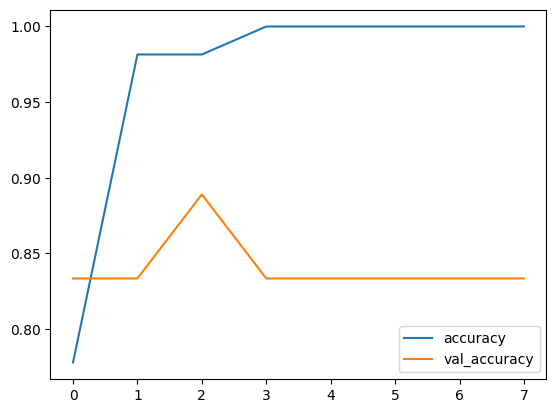

In [101]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

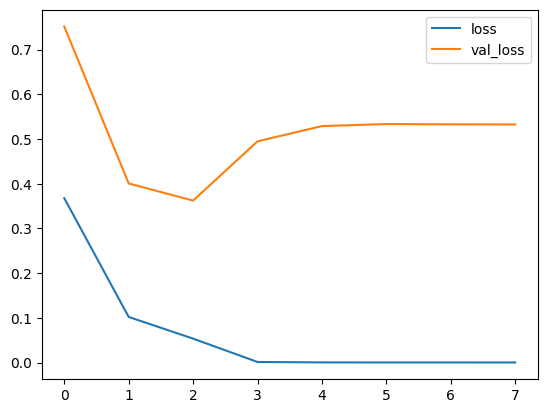

In [102]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [105]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

1/1 [==============================] - 0s 85ms/step


In [107]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8,  0],
       [10,  0]])

In [109]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         8
           1       0.00      0.00      0.00        10

    accuracy                           0.44        18
   macro avg       0.22      0.50      0.31        18
weighted avg       0.20      0.44      0.27        18



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
y_pred_train = np.argmax(model.predict(X_train), axis=-1)

2/2 [==============================] - 0s 9ms/step


In [112]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_train

array([[39,  0],
       [15,  0]])

In [113]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        39
           1       0.00      0.00      0.00        15

    accuracy                           0.72        54
   macro avg       0.36      0.50      0.42        54
weighted avg       0.52      0.72      0.61        54



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
